<a href="https://colab.research.google.com/github/99kenny/Deep-Learning/blob/main/VGGNet_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd /content/drive/MyDrive/"Colab Notebooks"/DeepLearningImplementation/Deep-Learning

!git config --global user.email 'helloiamkenny@gmail.com'
!git config --global user.name '99kenny'

/bin/bash: line 0: cd: /content/drive/MyDrive/Colab Notebooks/DeepLearningImplementation/Deep-Learning: No such file or directory


# VGGNet
- dataset : CIFAR-10

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Model
from keras import optimizers, regularizers, utils
from keras.preprocessing.image import ImageDataGenerator
from keras import utils
from tensorflow.keras.utils import to_categorical

In [ ]:
# download data
cifar10 = tf.keras.datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# fig = plt.figure(figsize=(20,20))
# axes = []
# for index, img in enumerate(train_images):
#   ax = fig.add_subplot(5,5,index+1)
#   ax.set_title(class_names[train_labels[index][0]])
#   ax.imshow(img)
#   axes.append(ax)
#   if (index+1) % 25 == 0:
#     break
# plt.show()

In [ ]:
train_images = train_images - np.mean(train_images, axis=(0, 1, 2))
test_images = test_images - np.mean(test_images, axis=(0, 1, 2))

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# split data -> validation, test
valid_images, valid_labels = test_images[0:5000,:], test_labels[0:5000,:]
test_images, test_labels = test_images[5000:,:], test_labels[5000:,:]

print(valid_images.shape)
print(valid_labels.shape)

(5000, 32, 32, 3)
(5000, 10)


In [ ]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,
            )  # randomly flip images

datagen.fit(train_images)

In [ ]:

weight_decay = 0.0005
img_rows, img_cols = 32, 32
img_channels = 3 

img_dim = (img_rows, img_cols, img_channels)  
img_input = Input(shape=img_dim)

def vgg_model():
  x = Conv2D(64,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(img_input) 
  x = Conv2D(64,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x) 
  x = BatchNormalization()(x)
  x = MaxPooling2D((2,2),strides=(2,2))(x) 
  x = Dropout(0.4)(x)


  x = Conv2D(128,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = Conv2D(128,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x) 
  x = BatchNormalization()(x)
  x = MaxPooling2D((2,2),strides=(2,2))(x) 
  x = Dropout(0.4)(x)

  x = Conv2D(256,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x) 
  x = Conv2D(256,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = BatchNormalization()(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 
  x = Dropout(0.4)(x)

  x = Conv2D(512,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = BatchNormalization()(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x) 
  x = Dropout(0.4)(x)

  x = Conv2D(512,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x) 
  x = Conv2D(512,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = Conv2D(512,(3,3),padding='same',activation = 'relu',kernel_regularizer=regularizers.l2(weight_decay))(x)
  x = BatchNormalization()(x) 
  x = MaxPooling2D((2,2),strides=(2,2))(x)

  x = Flatten()(x)
  x = Dense(1024, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1024, activation = 'relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(10, activation = 'softmax')(x)
  return x


model = Model(inputs=img_input, outputs = vgg_model())
models = [model]

# Train

In [ ]:
hist = []
for model in models:
  model.compile(optimizer='Adam', 
                loss='categorical_crossentropy', metrics=['accuracy'])


  from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
  learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                              patience=3, 
                                              verbose=1, 
                                              factor=0.1, 
                                              min_lr=0.00001)

  hist.append(model.fit(datagen.flow(train_images, train_labels, batch_size=128), epochs=100,
            validation_data=(valid_images, valid_labels),callbacks = [learning_rate_reduction]))

Epoch 1/100
391/391 [==============================] - 43s 82ms/step - loss: 3.6624 - accuracy: 0.2065 - val_loss: 2.6989 - val_accuracy: 0.2386 - lr: 0.0010
Epoch 2/100
391/391 [==============================] - 30s 77ms/step - loss: 2.3459 - accuracy: 0.2633 - val_loss: 2.1335 - val_accuracy: 0.2646 - lr: 0.0010
Epoch 3/100
391/391 [==============================] - 30s 78ms/step - loss: 1.9472 - accuracy: 0.3275 - val_loss: 2.0244 - val_accuracy: 0.2572 - lr: 0.0010
Epoch 4/100
391/391 [==============================] - 31s 78ms/step - loss: 1.7306 - accuracy: 0.3945 - val_loss: 1.9904 - val_accuracy: 0.3520 - lr: 0.0010
Epoch 5/100
391/391 [==============================] - 31s 79ms/step - loss: 1.6229 - accuracy: 0.4406 - val_loss: 1.6601 - val_accuracy: 0.4450 - lr: 0.0010
Epoch 6/100
391/391 [==============================] - 31s 79ms/step - loss: 1.5487 - accuracy: 0.4827 - val_loss: 1.5555 - val_accuracy: 0.4930 - lr: 0.0010
Epoch 7/100
391/391 [==============================]

# Test

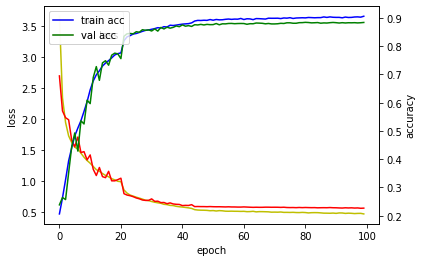

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = hist[0]

loss_ax.plot(hist.history['loss'], 'y', label='loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
predict_labels = model.predict(test_images)
accuracy = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.TopKCategoricalAccuracy(k=5)]
accuracy[0].update_state(test_labels,predict_labels)
accuracy[1].update_state(test_labels,predict_labels)

print("top-1 error : ", 1 - accuracy[0].result().numpy())
print("top-5 error : ", 1 - accuracy[1].result().numpy())

157/157 [==============================] - 2s 15ms/step
top-1 error :  0.11239999532699585
top-5 error :  0.004800021648406982
